In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
%matplotlib inline
from collections import OrderedDict
import astropy.coordinates as coord
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib.patches as mpatches

display(HTML("<style>.container { width:80% !important; }</style>"))

data = np.load('lvdb_v2.npy')
carray = [['k', 'GC'],['r','Likely GC'], ['g','Unknown'],['b','Likely galaxy'],['m','Galaxy']] #replace colors with mpl marker types, and replace c argument with marker in plot() function for unique markers 
types = ['GC','Likely GC','Unknown','Likely galaxy', 'Galaxy']
names = np.char.decode(data['key'])

type2 = data['type2']
type2[np.isnan(data['type2'])] = 2 #replace nan's with type2 = 2, "Unknown"

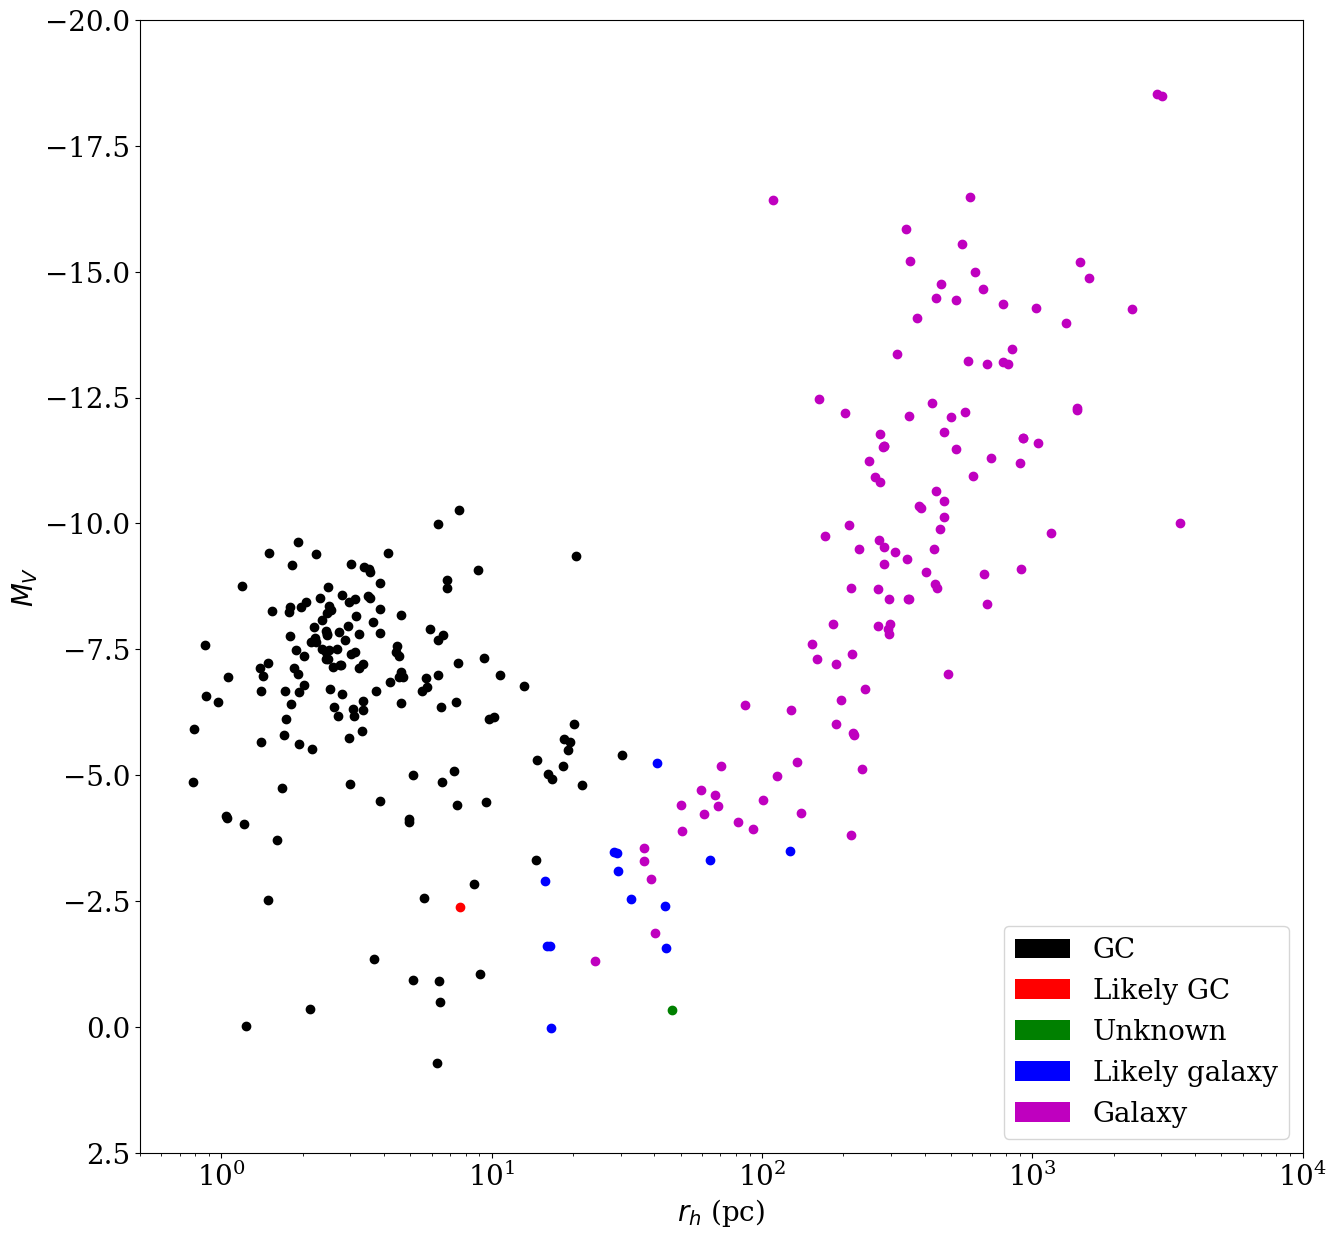

In [9]:
rhalf = np.radians(data['rhalf'] / 60.) * data['distance_kpc'] * 1000 
m_v   = data['m_v']

fig = plt.figure(figsize=(15,15), dpi=100)

for i,x in zip(range(len(data)), type2):    
    plt.scatter(rhalf[i],m_v[i],c=carray[int(x)][0], label=carray[int(x)][1])

plt.xscale('log')
plt.xlim(.5,1e4)
plt.ylim(-20.0,2.5)
plt.gca().invert_yaxis()
plt.xlabel('$r_h$ (pc)')
plt.ylabel('$M_V$')

#create legend 
recs = []
for i in range(0,len(carray)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=carray[i][0]))
plt.legend(recs,types,loc=4)

font = {'family':'serif', 'weight':'normal', 'size':20}
plt.rc('font', **font)

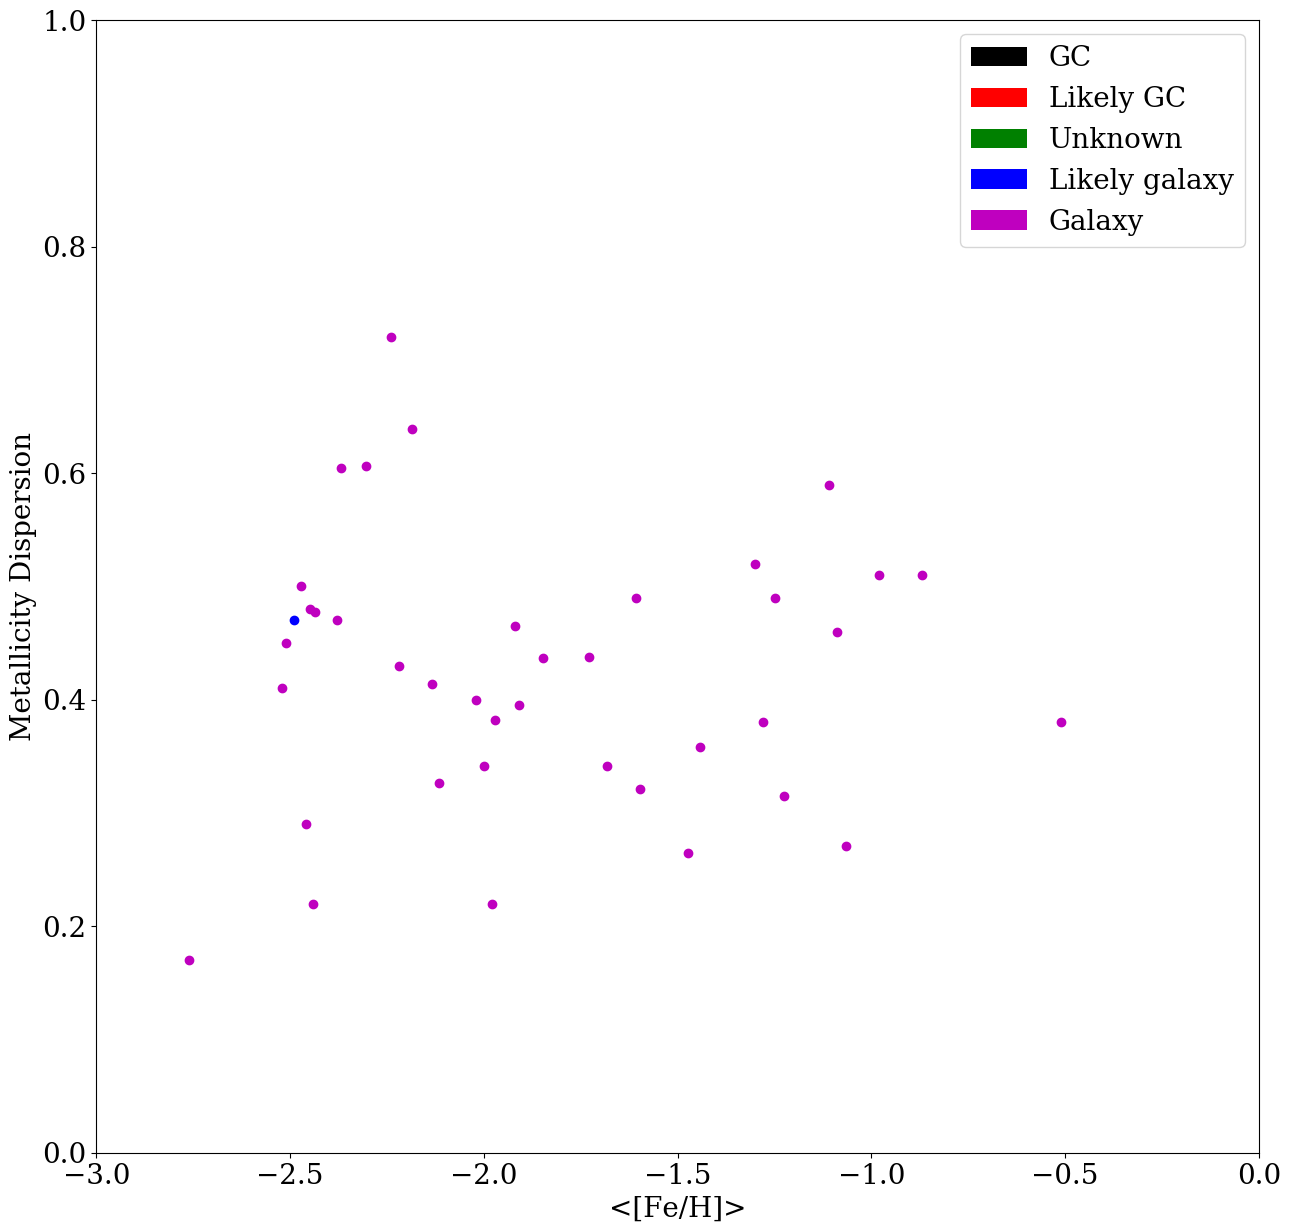

In [3]:
avg_metal  = data['average_metallicity']
metal_disp = data['metallicity_dispersion']

fig = plt.figure(figsize=(15,15), dpi=100)

for i,x in zip(range(len(data)), type2):    
    plt.scatter(avg_metal[i],metal_disp[i],c=carray[int(x)][0], label=carray[int(x)][1])

plt.xlim(-3,0)
plt.ylim(0,1)
plt.xlabel('<[Fe/H]>')
plt.ylabel('Metallicity Dispersion')

#create legend 
recs = []
for i in range(0,len(carray)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=carray[i][0]))
plt.legend(recs,types,loc=1)

font = {'family':'serif', 'weight':'normal', 'size':20}
plt.rc('font', **font)

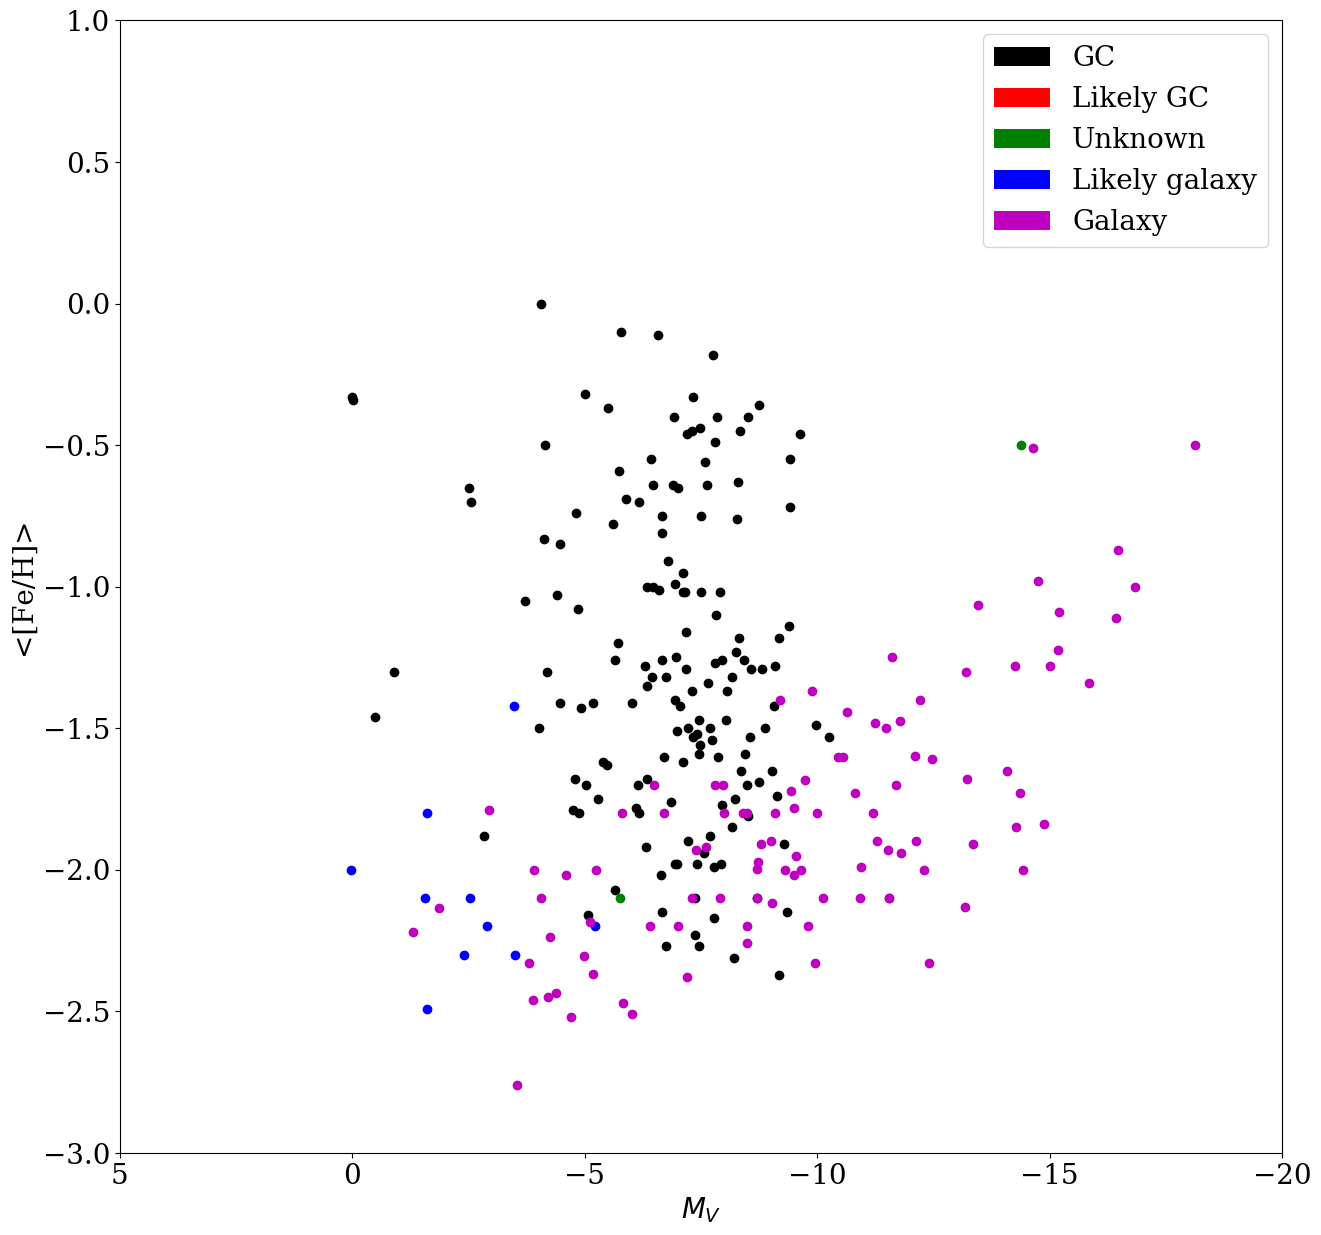

In [4]:
avg_metal  = data['average_metallicity']
m_v = data['m_v']

fig = plt.figure(figsize=(15,15), dpi=100)

for i,x in zip(range(len(data)), type2):    
    plt.scatter(m_v[i],avg_metal[i],c=carray[int(x)][0], label=carray[int(x)][1])

plt.xlim(-20,5)
plt.ylim(-3,1)
plt.xlabel('$M_V$')
plt.ylabel('<[Fe/H]>')
plt.gca().invert_xaxis()

#create legend 
recs = []
for i in range(0,len(carray)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=carray[i][0]))
plt.legend(recs,types,loc=1)


font = {'family':'serif', 'weight':'normal', 'size':20}
plt.rc('font', **font)

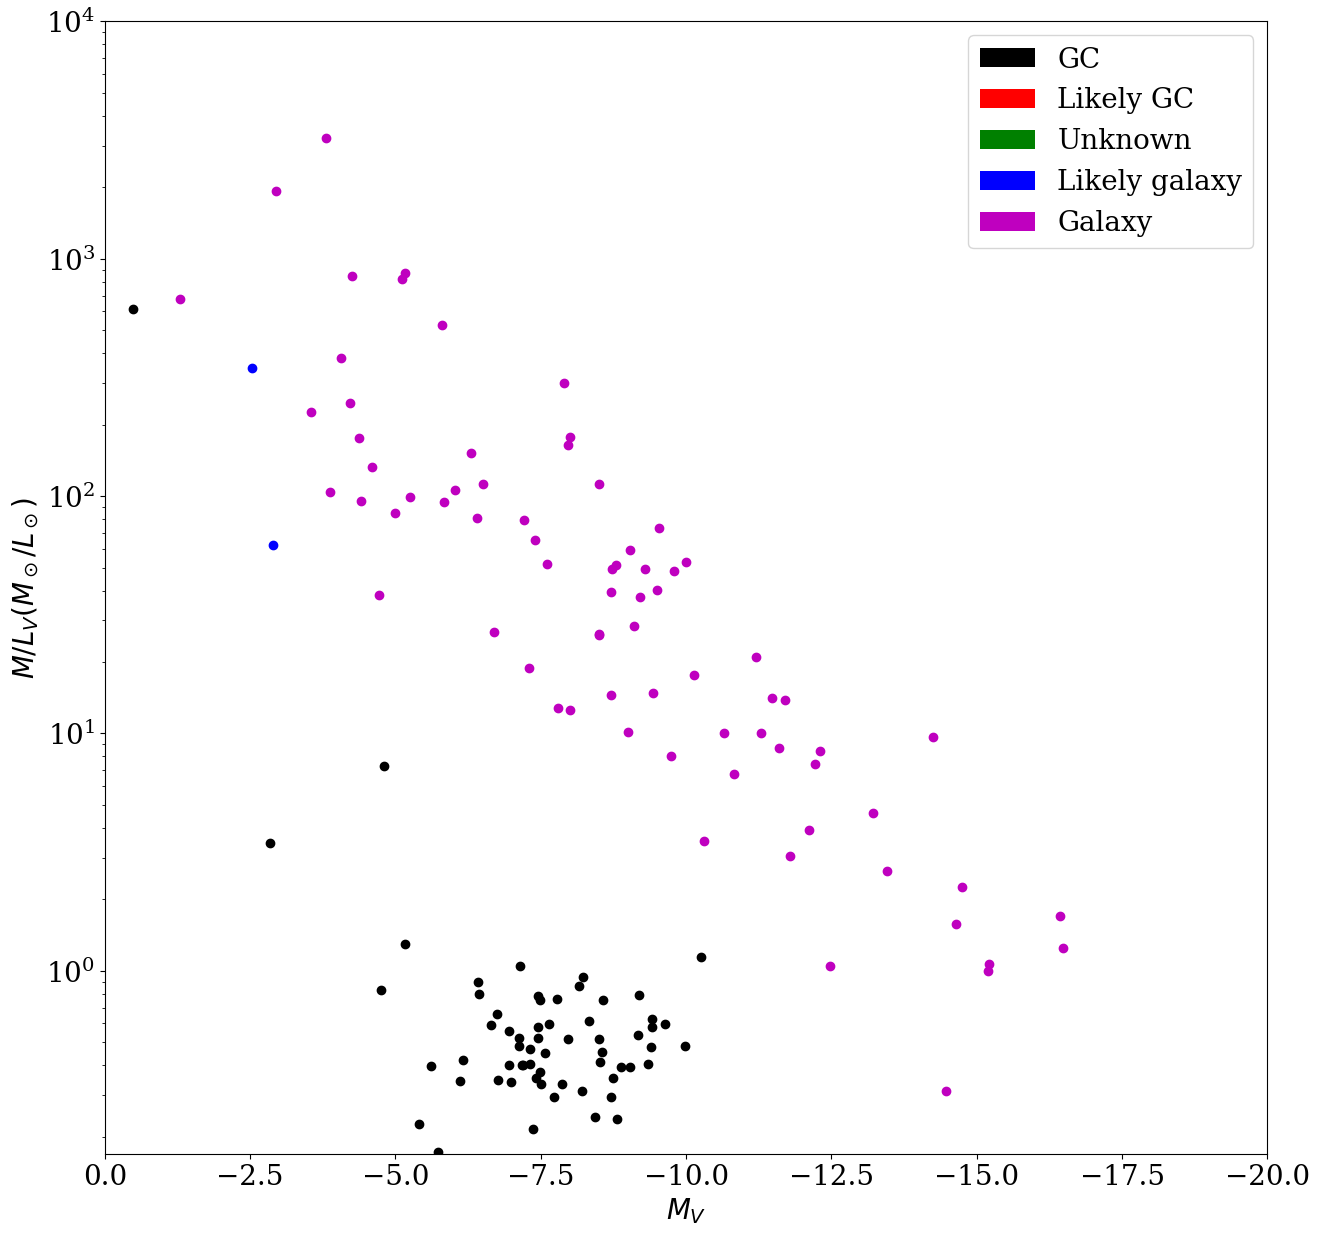

In [5]:
def lum(m_x, m_x_sun=4.83):
    return pow(10.,-.4*(m_x - m_x_sun) )

rhalf = np.radians(data['rhalf'] / 60.) * data['distance_kpc'] * 1000 
m_v = data['m_v']
vdisp = data['velocity_dispersion']

#derived values
dynamical_mass = 580. * rhalf * vdisp * vdisp
luminosity = lum(m_v, m_x_sun=4.83)
masslum = dynamical_mass / luminosity

fig = plt.figure(figsize=(15,15), dpi=100)

for i,x in zip(range(len(data)), type2):    
    plt.scatter(m_v[i],masslum[i],c=carray[int(x)][0], label=carray[int(x)][1])
    #plt.annotate(names[i], xy=(m_v[i], masslum[i]), clip_on=True, fontsize=15) #label points with key
    
plt.yscale('log')
plt.xlim(0,-20)
plt.ylim(0,1e4)
plt.xlabel('$M_V$')
plt.ylabel('$M / L_V   ( M_\odot / L_\odot )$')

#create legend 
recs = []
for i in range(0,len(carray)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=carray[i][0]))
plt.legend(recs,types,loc=1)


font = {'family':'serif', 'weight':'normal', 'size':20}
plt.rc('font', **font)

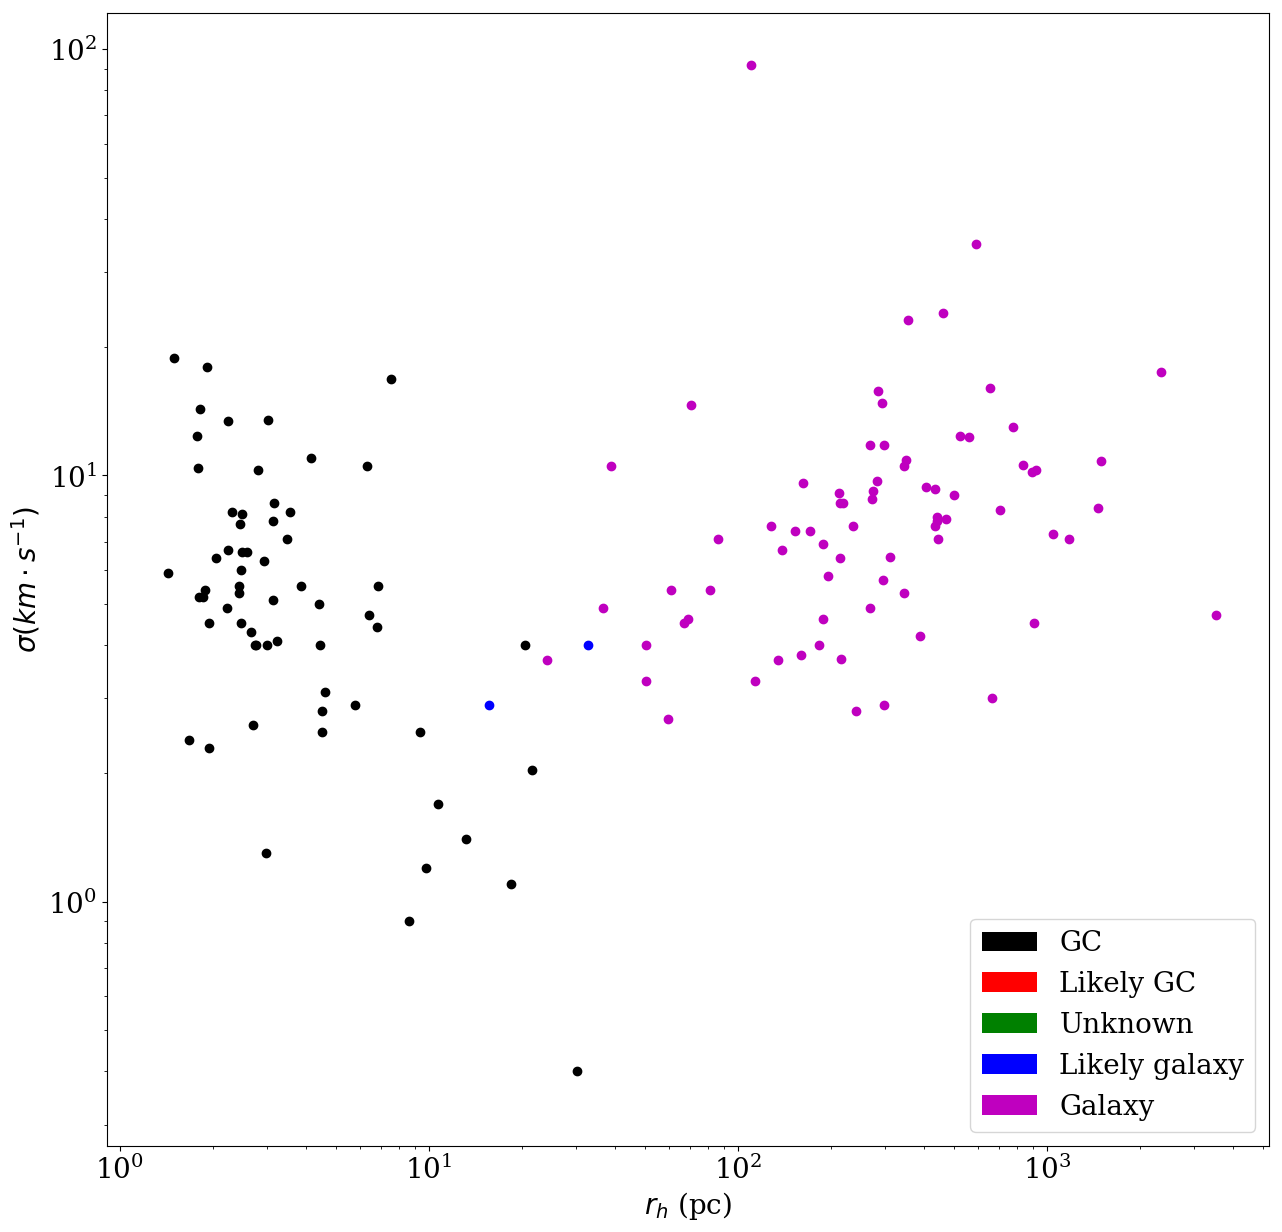

In [6]:
#derived values
rhalf = np.radians(data['rhalf'] / 60.) * data['distance_kpc'] * 1000 
vdisp = data['velocity_dispersion']

fig = plt.figure(figsize=(15,15), dpi=100)

for i,x in zip(range(len(data)), type2):    
    plt.scatter(rhalf[i],vdisp[i],c=carray[int(x)][0], label=carray[int(x)][1])
    
plt.xscale('log')
plt.yscale('log')
# plt.xlim(0,5e3)
# plt.ylim(0,50)
plt.xlabel('$r_h$ (pc)')
plt.ylabel('$\sigma (km \cdot s^{-1})$')

#create legend 
recs = []
for i in range(0,len(carray)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=carray[i][0]))
plt.legend(recs,types,loc=4)

font = {'family':'serif', 'weight':'normal', 'size':20}
plt.rc('font', **font)

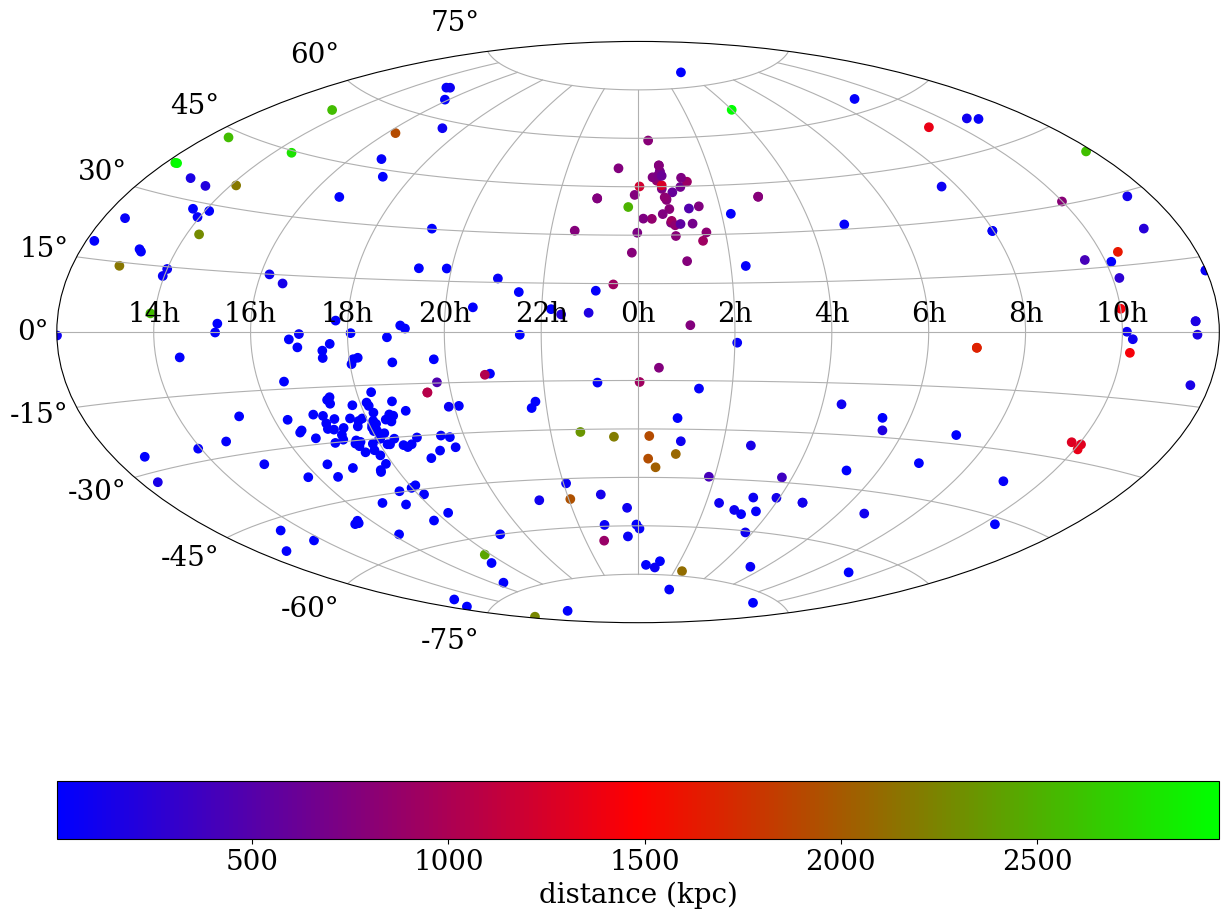

In [7]:
#RA, Dec positional plot

ra = coord.Angle(data['ra']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(data['dec']*u.degree)

fig = plt.figure(figsize=(15,14),dpi=100)
ax = fig.add_subplot(111, projection="aitoff")
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
image = ax.scatter(ra.radian, dec.radian, c=data['distance_kpc'], cmap='brg')
cbar = plt.colorbar(image,label='distance (kpc)',orientation="horizontal",)
ax.grid(True)

font = {'family':'serif', 'weight':'normal', 'size':15}
plt.rc('font', **font)